<a href="https://colab.research.google.com/github/RoyElkabetz/Tensor-Networks-Simple-Update/blob/main/univeral_tensor_network_paper__reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## uncomment only if running from google.colab
# clone the git reposetory
!git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update
# add path to .py files for import
import sys
sys.path.insert(1, "/content/Tensor-Networks-Simple-Update/src")

Cloning into 'Tensor-Networks-Simple-Update'...
remote: Enumerating objects: 264, done.
remote: Counting objects: 100% (264/264), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 264 (delta 146), reused 122 (delta 50), pack-reused 0
Receiving objects: 100% (264/264), 443.93 KiB | 16.44 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from TensorNetwork import TensorNetwork
import SimpleUpdate as su

np.random.seed(216)

In [3]:
# Pauli matrices
pauli_x = np.array([[0, 1],
                    [1, 0]])
pauli_y = np.array([[0, -1j],
                    [1j, 0]])
pauli_z = np.array([[1, 0],
                    [0, -1]])
s_i = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_j = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_k = [pauli_x / 2.]

# Infinite Chain Tensor-Network Simple-Update Simulation

In [ ]:
# The Tensor Network structure matrix
chain_structure_matrix = np.array([[1, 2],
                                  [1, 2]])

# Simple-Update parameters
d_max_chain = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60]
error = 1e-6
max_iterations = 200
chain_energy = []
j_ij_chain = [1., 1.]
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_chain:
    chain = TensorNetwork(structure_matrix=chain_structure_matrix, virtual_size=2)
    chain_su = su.SimpleUpdate(tensor_network=chain, 
                               dts=dts, 
                               j_ij=j_ij_chain, 
                               h_k=h_k, 
                               s_i=s_i, 
                               s_j=s_j, 
                               s_k=s_k, 
                               d_max=d_max, 
                               max_iterations=max_iterations, 
                               convergence_error=error, 
                               log_energy=True,
                               print_process=False)
    chain_su.run()
    energy = chain_su.energy_per_site()
    print(f'| D max: {d_max} | Chain Energy: {energy}\n')
    chain_energy.append(energy)

Simple Update converged. final error is 0.0000000375

| D max: 2 | Chain Energy: -0.4278841718306421

Simple Update converged. final error is 0.0000001064

| D max: 3 | Chain Energy: -0.3406594961217396

Simple Update converged. final error is 0.0000000281

| D max: 4 | Chain Energy: -0.44103661802110183

Simple Update converged. final error is 0.0000000348

| D max: 5 | Chain Energy: -0.43121505975684027

Simple Update converged. final error is 0.0000000283

| D max: 6 | Chain Energy: -0.4424532493015172

Simple Update converged. final error is 0.0000000503

| D max: 7 | Chain Energy: -0.43784994592428106

Simple Update converged. final error is 0.0000000261

| D max: 8 | Chain Energy: -0.44273077383784887

Simple Update converged. final error is 0.0000000201

| D max: 9 | Chain Energy: -0.44146245156917496

Simple Update converged. final error is 0.0000000364

| D max: 10 | Chain Energy: -0.44285475081279935

Simple Update converged. final error is 0.0000000955

| D max: 20 | Chain E

# Infinite PEPS Tensor-Network Simple-Update Simulation

In [ ]:
# The Tensor Network structure matrix
peps_structure_matrix = np.array([[1, 2, 3, 4, 0, 0, 0, 0],
                                  [1, 2, 0, 0, 3, 4, 0, 0],
                                  [0, 0, 1, 2, 0, 0, 3, 4,],
                                  [0, 0, 0, 0, 1, 2, 3, 4]])
# Simple-Update parameters
d_max_peps = [2, 3, 4, 5, 6]
error = 1e-6
max_iterations = 200
peps_energy = []
j_ij_peps = [1.] * 8
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_peps:
    peps = TensorNetwork(structure_matrix=peps_structure_matrix, virtual_size=2)
    peps_su = su.SimpleUpdate(tensor_network=peps, 
                              dts=dts, 
                              j_ij=j_ij_peps, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=True)
    peps_su.run()
    energy = peps_su.energy_per_site()
    print(f'| D max: {d_max} | PEPS Energy: {energy}\n')
    peps_energy.append(energy)

| dt 0.100000 |    20/  200 iteration | averaged error 0.0004757168 | energy per-site -0.628192 | time 0.34 sec
| dt 0.100000 |    40/  200 iteration | averaged error 0.0000014968 | energy per-site -0.628548 | time 0.36 sec
| dt 0.100000 |    60/  200 iteration | averaged error 0.0000000047 | energy per-site -0.628548 | time 0.34 sec
| dt 0.010000 |    20/  200 iteration | averaged error 0.0001808926 | energy per-site -0.648125 | time 0.35 sec
| dt 0.010000 |    40/  200 iteration | averaged error 0.0000923876 | energy per-site -0.648309 | time 0.33 sec
| dt 0.010000 |    60/  200 iteration | averaged error 0.0000472957 | energy per-site -0.648364 | time 0.34 sec
| dt 0.010000 |    80/  200 iteration | averaged error 0.0000244788 | energy per-site -0.648382 | time 0.33 sec
| dt 0.010000 |   100/  200 iteration | averaged error 0.0000131272 | energy per-site -0.648388 | time 0.35 sec
| dt 0.010000 |   120/  200 iteration | averaged error 0.0000070600 | energy per-site -0.648391 | time 0

# Infinite Star Tensor-Network Simple-Update Simulation

In [ ]:
# The Tensor Network structure matrix
star_structure_matrix = np.array([[1, 2, 3, 0, 0, 0, 0, 0, 0],
                                  [1, 0, 0, 2, 3, 0, 0, 0, 0],
                                  [0, 1, 0, 2, 0, 3, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1, 2, 3, 0],
                                  [0, 0, 0, 0, 1, 0, 2, 0, 3],
                                  [0, 0, 1, 0, 0, 0, 0, 2, 3]])
# Simple-Update parameters
d_max_star = [2, 3, 4, 5, 6, 7, 8, 9]
error = 1e-5
max_iterations = 100
star_energy = []
j_ij_star = [1, 1, 0.05, 1, 0.05, 0.05, 1, 1, 1]
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = 0.


# Run
for d_max in d_max_star:
    star = TensorNetwork(structure_matrix=star_structure_matrix, virtual_size=2)
    star_su = su.SimpleUpdate(tensor_network=star, 
                              dts=dts, 
                              j_ij=j_ij_star, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=True)
    star_su.run()
    energy = star_su.energy_per_site()
    print(f'| D max: {d_max} | Star Energy: {energy}\n')
    star_energy.append(energy)

| dt 0.100000 |    20/  100 iteration | averaged error 0.0028116062 | energy per-site -0.321699 | time 0.34 sec
| dt 0.100000 |    40/  100 iteration | averaged error 0.0024324170 | energy per-site -0.328621 | time 0.35 sec
| dt 0.100000 |    60/  100 iteration | averaged error 0.0045806344 | energy per-site -0.339458 | time 0.34 sec
| dt 0.100000 |    80/  100 iteration | averaged error 0.0025168002 | energy per-site -0.351331 | time 0.34 sec
| dt 0.010000 |    20/  100 iteration | averaged error 0.0000663567 | energy per-site -0.353731 | time 0.35 sec
| dt 0.010000 |    40/  100 iteration | averaged error 0.0000569967 | energy per-site -0.353785 | time 0.35 sec
| dt 0.010000 |    60/  100 iteration | averaged error 0.0000490641 | energy per-site -0.353823 | time 0.35 sec
| dt 0.010000 |    80/  100 iteration | averaged error 0.0000423643 | energy per-site -0.353851 | time 0.33 sec
| dt 0.001000 |    20/  100 iteration | averaged error 0.0000039021 | energy per-site -0.353974 | time 0

# Infinite Cube Tensor-Network Simple-Update Simulation

In [ ]:
# The Tensor Network structure matrix
cube_structure_matrix = np.array([[1, 2, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [1, 2, 0, 0, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 5, 6, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 5, 6, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 5, 6],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 4, 0, 0, 5, 6]])

# Simple-Update parameters
d_max_cube = [2, 3]
error = 1e-4
max_iterations = 50
cube_energy = []
j_ij_cube = [1.] * 24
dts = [0.1, 0.01, 0.001, 0.0001]
h_k = 0.


# Run
for d_max in d_max_cube:
    cube = TensorNetwork(structure_matrix=cube_structure_matrix, virtual_size=2)
    cube_su = su.SimpleUpdate(tensor_network=cube, 
                              dts=dts, 
                              j_ij=j_ij_cube, 
                              h_k=h_k, 
                              s_i=s_i, 
                              s_j=s_j, 
                              s_k=s_k, 
                              d_max=d_max, 
                              max_iterations=max_iterations, 
                              convergence_error=error, 
                              log_energy=True,
                              print_process=True)
    cube_su.run()
    energy = cube_su.energy_per_site()
    print(f'| D max: {d_max} | Cube Energy: {energy}\n')
    cube_energy.append(energy)

| dt 0.100000 |    20/   50 iteration | averaged error 0.0001451399 | energy per-site -0.844501 | time  1.8 sec
| dt 0.100000 |    40/   50 iteration | averaged error 0.0000056125 | energy per-site -0.845472 | time  1.7 sec
| dt 0.010000 |    20/   50 iteration | averaged error 0.0001601755 | energy per-site -0.876865 | time  1.7 sec
| dt 0.010000 |    40/   50 iteration | averaged error 0.0000595986 | energy per-site -0.877014 | time  1.7 sec
| dt 0.001000 |    20/   50 iteration | averaged error 0.0000143051 | energy per-site -0.879821 | time  1.8 sec
| dt 0.000100 |    20/   50 iteration | averaged error 0.0000043400 | energy per-site -0.880098 | time  1.8 sec
Simple Update converged. final error is 0.0000043400

| D max: 2 | Cube Energy: -0.8800979887507947

| dt 0.100000 |    20/   50 iteration | averaged error 0.0009546697 | energy per-site -0.848891 | time 1.1e+02 sec
| dt 0.100000 |    40/   50 iteration | averaged error 0.0003558187 | energy per-site -0.849999 | time 1.1e+02 s

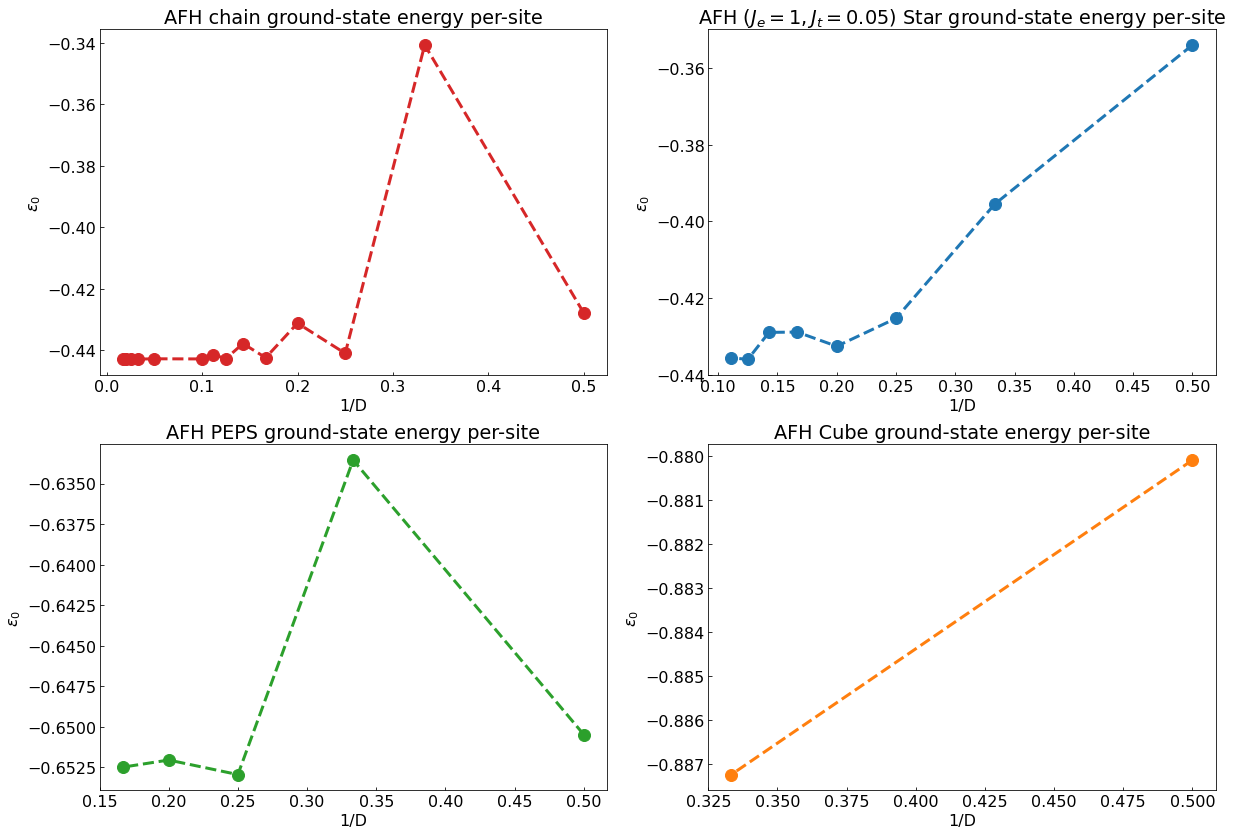

In [ ]:
  
plt.rcParams.update({'font.size': 16, 
                     "figure.facecolor": 'white', 
                     "axes.facecolor": 'white', 
                     "savefig.facecolor": 'white', 
                     'savefig.edgecolor' : 'white', 
                     'figure.edgecolor' : 'white'})

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes[0, 0].plot(1 / np.array(d_max_chain), chain_energy, '--o', color='tab:red', linewidth=3, markersize=12)
axes[0, 0].set_xlabel(r'1/D')
axes[0, 0].set_ylabel(r'$\epsilon_0$')
axes[0, 0].set_title('AFH chain ground-state energy per-site')
axes[0, 0].tick_params(direction='in', axis='both')

axes[1, 0].plot(1 / np.array(d_max_peps), peps_energy, '--o', color='tab:green', linewidth=3, markersize=12)
axes[1, 0].set_xlabel(r'1/D')
axes[1, 0].set_ylabel(r'$\epsilon_0$')
axes[1, 0].set_title('AFH PEPS ground-state energy per-site')
axes[1, 0].tick_params(direction='in', axis='both')

axes[0, 1].plot(1 / np.array(d_max_star), star_energy, '--o', color='tab:blue', linewidth=3, markersize=12)
axes[0, 1].set_xlabel(r'1/D')
axes[0, 1].set_ylabel(r'$\epsilon_0$')
axes[0, 1].set_title(r'AFH ($J_e=1, J_t=0.05$) Star ground-state energy per-site')
axes[0, 1].tick_params(direction='in', axis='both')

axes[1, 1].plot(1 / np.array(d_max_cube), cube_energy, '--o', color='tab:orange', linewidth=3, markersize=12)
axes[1, 1].set_xlabel(r'1/D')
axes[1, 1].set_ylabel(r'$\epsilon_0$')
axes[1, 1].set_title('AFH Cube ground-state energy per-site')
axes[1, 1].tick_params(direction='in', axis='both')


## Quantum Ising model in transverse magnetic field on $2d$ square lattice

In [5]:
# The Tensor Network structure matrix
ising_structure_matrix = np.array([[1, 2, 3, 4, 0, 0, 0, 0],
                                  [1, 2, 0, 0, 3, 4, 0, 0],
                                  [0, 0, 1, 2, 0, 0, 3, 4,],
                                  [0, 0, 0, 0, 1, 2, 3, 4]])
# Simple-Update parameters
d_max_ising = [2]
error = 1e-6
max_iterations = 200
ising_energy = []
ising_z_magnetizaton = []

j_ij_ising = [-1.] * 8
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
h_k = -np.linspace(0, 4, 20)

s_i = [pauli_z]
s_j = [pauli_z]
s_k = [pauli_x]


# Run
for d_max in d_max_ising:
    for h in h_k:
        ising = TensorNetwork(structure_matrix=ising_structure_matrix, virtual_size=2)
        ising_su = su.SimpleUpdate(tensor_network=ising, 
                                  dts=dts, 
                                  j_ij=j_ij_ising, 
                                  h_k=h, 
                                  s_i=s_i, 
                                  s_j=s_j, 
                                  s_k=s_k, 
                                  d_max=d_max, 
                                  max_iterations=max_iterations, 
                                  convergence_error=error, 
                                  log_energy=False,
                                  print_process=True)
        ising_su.run()
        energy = ising_su.energy_per_site()
        z_magnetization = ising_su.expectation_per_site(pauli_z)
        print(f'| D max: {d_max} | h: {h} | Energy: {energy} | Magnetization: {z_magnetization} |')
        ising_energy.append(energy)
        ising_z_magnetizaton.append(z_magnetization)


| dt 0.100000 |    20/  200 iteration | averaged error 0.0000000000 | time 0.21 sec
| dt 0.010000 |    20/  200 iteration | averaged error 0.0000000000 | time 0.23 sec
| dt 0.001000 |    20/  200 iteration | averaged error 0.0000000000 | time 0.22 sec
| dt 0.000100 |    20/  200 iteration | averaged error 0.0000000000 | time 0.22 sec
| dt 0.000010 |    20/  200 iteration | averaged error 0.0000000000 | time 0.21 sec
Simple Update converged. final error is 0.0000000000

| D max: 2 | h: -0.0 | Energy: -2.0 | Magnetization: (-1+0j) |
| dt 0.100000 |    20/  200 iteration | averaged error 0.0000000048 | time 0.35 sec
| dt 0.010000 |    20/  200 iteration | averaged error 0.0000009300 | time 0.35 sec
| dt 0.001000 |    20/  200 iteration | averaged error 0.0000001482 | time 0.33 sec
| dt 0.000100 |    20/  200 iteration | averaged error 0.0000000153 | time 0.33 sec
| dt 0.000010 |    20/  200 iteration | averaged error 0.0000000015 | time 0.32 sec
Simple Update converged. final error is 0.0

KeyboardInterrupt: ignored